# Space Element Reduction Model animation
Author: Tuomas Sorakivi, Tommy Leon Wood

MovieWriter imagemagick unavailable; using Pillow instead.


Frames HGev  25  Frames PiPev  26


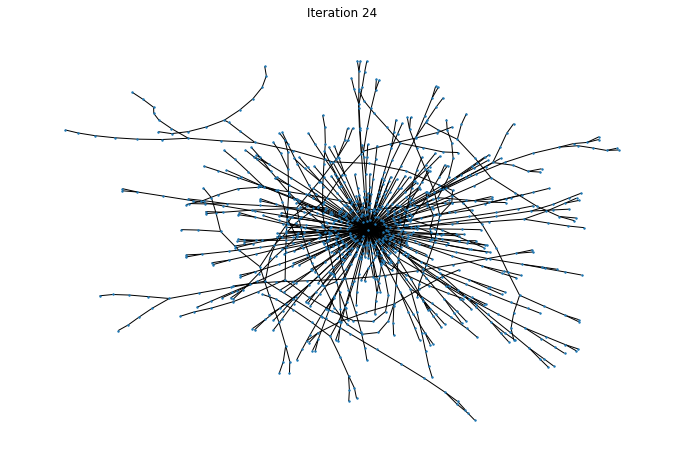

None

MovieWriter imagemagick unavailable; using Pillow instead.


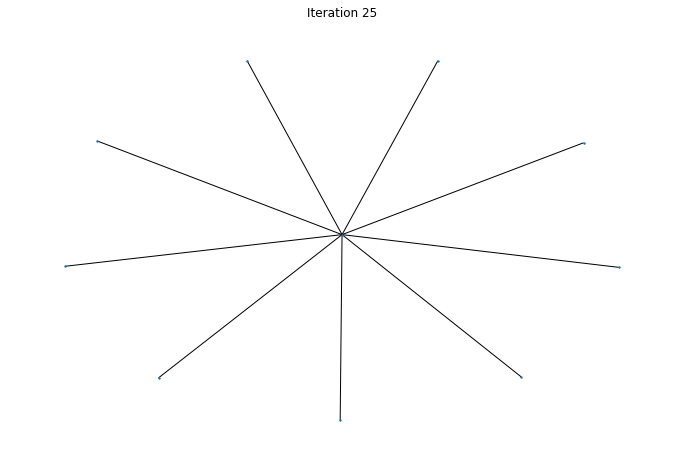

None

In [11]:
import random
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from matplotlib import animation

TS=25
pd=0.1
ps=1/2

SEn=1
SEin=2
SEinSet=["s1"]

PPn=2
PPin=3
PPinSet=["p1","p2"]
SEset = {
    "s1" :  ["x2","x3"]
}


PPset= {
    "p1" :  ["x2"],
    "p2" :  ["x3"]
}

IGset={
    "x2" : ["p1","s1"],
    "x3" : ["s1","p2"]
}

PIPset={
    "i1" : ["p1","x1"],
    "i2" : ["s1","x2"]
}

PIPinSet=["i1","i2"]
PIPin=3
PIPn=2

IGn=2
IGin=4

PSBn=0
PSBin=1
PSBset={
}
PSBinSet=[]

PPsSplitInd=[2,2]

HGev=[]

PIPev=[]
PIPs=[]
PIPList=list(PIPset.values())
for i in range(len(PIPList)):
    PIPs.append(PIPList[i][1])
PIPev.append(PIPs)

def replaceEl(oldEl,newEl,array):
    for i1 in range(len(array)):
        if array[i1]==oldEl:
             array[i1]=newEl
             break
    return array

def removeEl(el,array):
    for i1 in range(len(array)):
        if array[i1]==el:
            array.pop(i1)
            break
    return array

for t in range(TS):


    SEnTemp=SEn
    for s in range(SEn):
        rand=random.random()
        if rand<pd:
            SEind=SEinSet[s]
            IGin1=SEset[SEind][1]
            IGin2="x"+str(IGin)
            SEin1="s"+str(SEin)
            SEset[SEind][1]=IGin2
            SEset[SEin1]=[IGin2,IGin1]
            IGset[IGin2]=[SEind,SEin1]
            replaceEl(SEind,SEin1,IGset[IGin1])
            if PSBset.get(IGin1)!=None:
                if PSBset[IGin1]==SEind:
                    PSBset[IGin1]=SEin1
            SEinSet.append(SEin1)
            SEin+=1
            SEnTemp+=1
            IGin+=1
            IGn+=1
    SEn=SEnTemp

    PPnTemp=PPn
    for p in range(PPn):
        rand=random.random()
        if p>0:
            if PPsSplitInd[p]==1:
                if rand<ps:
                    PPind=PPinSet[p]
                    IGin1=PPset[PPind][0]
                    PPin1="p"+str(PPin)
                    PPset[PPin1]=[str(PPset[PPind][0])]
                    PSBinSet.append(IGin1)
                    SEin1=""
                    for x in range(len(IGset[IGin1])):
                        if IGset[IGin1][x]!=PPind:
                            SEin1=IGset[IGin1][x]
                            break
                    PSBset[IGin1]=SEin1
                    PSBn+=1
                    IGset[IGin1].append(PPin1)
                    PPinSet.append(PPin1)
                    PPin+=1
                    PPnTemp+=1
                    PPsSplitInd[p]=0
                    PPsSplitInd.append(0)
            else:
                PPsSplitInd[p]=1
    PPn=PPnTemp


    PIPnTemp=PIPn
    shift=0
    for y1 in range(PIPn):
        PIPind=PIPinSet[y1-shift]
        PIP=PIPset[PIPind]
        if PIP[0][:1]=="p":
            PIPset.pop(PIPind)
            PIPnTemp-=1
            PIPinSet.pop(y1-shift)
            shift+=1
        else:
            for z1 in range(len(IGset[PIP[1]])):
                if IGset[PIP[1]][z1]==PIP[0]:
                    if SEset[PIP[0]][0]!=PIP[1]:
                        PIPset[PIPind][1]=SEset[PIP[0]][0]
                        if len(IGset[SEset[PIP[0]][0]])<3:
                            if IGset[SEset[PIP[0]][0]][0]!=SEset[PIP[0]][0]:
                                PIPset[PIPind][0]=IGset[SEset[PIP[0]][0]][0]
                            else:
                                PIPset[PIPind][0]=IGset[SEset[PIP[0]][0]][1]
                        else:
                            PIPset[PIPind][0]=PSBset[SEset[PIP[0]][0]]
                    else:
                        
                        PIPset[PIPind][1]=SEset[PIP[0]][1]
                        if len(IGset[SEset[PIP[0]][1]])<3:
                            if IGset[SEset[PIP[0]][1]][0]!=SEset[PIP[0]][1]:
                                PIPset[PIPind][0]=IGset[SEset[PIP[0]][1]][0]
                            else:
                                PIPset[PIPind][0]=IGset[SEset[PIP[0]][1]][1]
                        else:
                            PIPset[PIPind][0]=PSBset[SEset[PIP[0]][1]]
                    break

    if PSBn>0:
        PSBnTemp=PSBn
        shift=0
        for b in range(PSBn):
            PSBind=PSBinSet[b-shift]
            ELin1=PSBset[PSBind]
            IGin1=PSBind
            ELfrom=""
            
            if IGset[IGin1][0]!=ELin1:
                if IGset[IGin1][1]!=ELin1:
                    ELfrom=IGset[IGin1][1]
                    IGset[IGin1].pop(1)
                else:
                    ELfrom=IGset[IGin1][2]
                    IGset[IGin1].pop(2)
            else:
                ELfrom=IGset[IGin1][2]
                IGset[IGin1].pop(2)
                

            if ELin1[:1]=="s":
                IGin2="x"+str(IGin)
                SEin2="s"+str(SEin)

                IGprop1=""
                if SEset[ELin1][0]==IGin1:
                    IGprop1=SEset[ELin1][1]
                else:
                    IGprop1=SEset[ELin1][0]

                ELprop1=""
                if IGset[IGprop1][0]==ELin1:
                    ELprop1=IGset[IGprop1][1]
                else:
                    ELprop1=IGset[IGprop1][0]
                PSBset[IGprop1]=ELprop1
                PSBinSet[b-shift]=IGprop1

                IGset[IGin2]=[ELfrom,SEin2]
                SEset[SEin2]=[IGin2,IGprop1]

                IGset[IGprop1].append(SEin2)
                
                if ELfrom[:1]=="s":
                    if SEset[ELfrom][0]==IGin1:
                        SEset[ELfrom][0]=IGin2
                    else:
                        SEset[ELfrom][1]=IGin2
                else:
                        PPset[ELfrom][0]=IGin2

                SEinSet.append(SEin2)
                IGin+=1
                IGn+=1
                SEin+=1
                SEn+=1
            else:
                IGin2="x"+str(IGin)
                IGset[IGin2]=[ELin1,ELfrom]

                if SEset[ELfrom][0]==IGin1:
                    SEset[ELfrom][0]=IGin2
                else:
                    SEset[ELfrom][1]=IGin2

                PPset[ELin1].append(IGin2)
                IGin+=1
                IGn+=1

                PSBinSet.pop(b-shift)
                shift+=1
                PSBnTemp-=1
        PSBn=PSBnTemp

    
    for y1 in range(PPn):
        if y1>0:
            PPind=PPinSet[y1]
            PIPindSym="i"+str(PIPin)
            IGin1=PPset[PPind][0]
            SEin1=""
            if IGset[IGin1][0][:1]=="s":
                SEin1=IGset[IGin1][0]
            else:
                SEin1=IGset[IGin1][1]
            PIPset[PIPindSym]=[SEin1,IGin1]
            PIPinSet.append(PIPindSym)
            PIPnTemp+=1
            PIPin+=1
    
    PIPn=PIPnTemp

    PIPs=[]
    PIPList=list(PIPset.values())
    for i in range(len(PIPList)):
        PIPs.append(PIPList[i][1])
    PIPev.append(PIPs)



    for i in range(len(PPset["p1"])):
        cenSym="c"+str(i)
        SEset[cenSym]=[PPset["p1"][i],"x1"]
    HGev.append(list(SEset.values()))
    for i in range(len(PPset["p1"])):
        cenSym="c"+str(i)
        SEset.pop(cenSym)

g = open(".//PIPev1.txt", "w")
g.write(str(PIPev))
g.close()

f = open(".//HGev1.txt", "w")
f.write(str(HGev))
f.close()
    

def add_edge(edge, G):
    G.add_edge(edge[0], edge[1])
    return G
        
def simple_update(num, size, ax, data):
    ax.clear()
    G = nx.Graph()
    nodes = data[num]
    for edge_collection in nodes:
        G = add_edge(edge_collection, G)
                
    layout = nx.spring_layout(G)
    nx.draw(G, pos=layout,node_size=2, ax=ax)
    ax.set_title("Iteration {}".format(num))

def create_animation(data, name):
    fig, ax = plt.subplots(figsize=(12,8))
    size = len(data)
    ani = animation.FuncAnimation(fig, simple_update, frames=size, fargs=(size, ax, data), interval=500, repeat_delay=2000)
    ani.save('SERDradEvWithInfoPropA1_'+name+'.gif', writer='imagemagick')
    display(plt.show())

print("Frames HGev ",len(HGev), " Frames PiPev ", len(PIPev))
    
create_animation(HGev, "HGev")

create_animation(PIPev, "PIPev")